In [1]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.layers import *
from lib.activations import *
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical
from lib.optimizers import *
from lib.model import *
from lib.dataset import ImageClassificationDataset

In [8]:
dataset = ImageClassificationDataset()
dataset.load("/home/deni/Cloud/Laptop/Projects/Python/cnn_from_scratch/dataset")
dataset.augment()
dataset.preprocess(
     size = 28,
     grayscale = False,
     white_balance = False
)
dataset.shuffle()
dataset.normalize()
dataset.reshape()

X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split()


print(dataset.X[0])
print(dataset.X[10].shape)
print("shape", dataset.X.shape)

print(dataset.X.min(), dataset.X.max())

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.78039217 -0.6313726  -0.4509804  -0.38039216 -0.25490198
 -0.23137255 -0.3019608  -0.4745098  -0.6862745  -0.90588236 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -0.99215686 -1.         -0.9764706
 -1.         -0.96862745 -0.12156863  0.46666667  0.5686275   0.6313726
  0.6313726   0.6862745   0.6627451   0.6156863   0.5921569   0.6
  0.54509807  0.5294118   0.49803922  0.33333334  0.15294118 -0.5137255
 -1.         -1.         -0.99215686 -1.         -1.         -1.
 -1.         -1.         -0.9607843  -1.         -0.7411765 

Train batch contains 49_000 images
Validation batch contains 14_000 images
Test batch contains 7_000 images


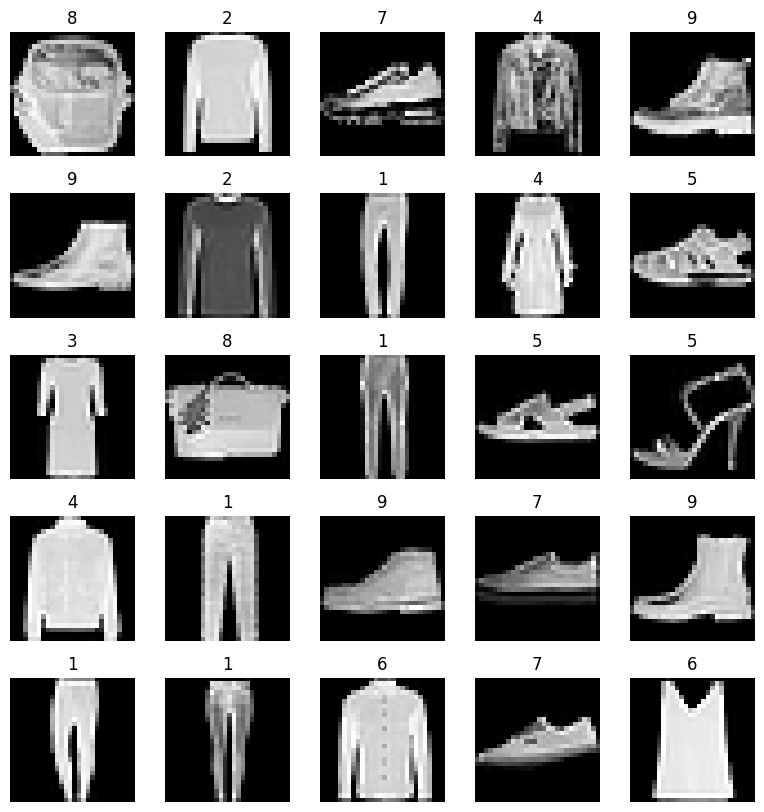

In [9]:
dataset.preview()

INNEN

In [11]:
model = Model()
# Add layers
model.add(Layer_Dense(X_train.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-4),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid),
    epochs=10, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.094, loss: 3.105 (data_loss: 3.105,reg_loss: 0.000), lr: 0.001
    step: 100, acc: 0.750, loss: 0.658 (data_loss: 0.658,reg_loss: 0.000), lr: 0.0009900990099009901
    step: 200, acc: 0.766, loss: 0.697 (data_loss: 0.697,reg_loss: 0.000), lr: 0.000980392156862745
    step: 300, acc: 0.812, loss: 0.561 (data_loss: 0.561,reg_loss: 0.000), lr: 0.0009708737864077671
    step: 382, acc: 0.885, loss: 0.321 (data_loss: 0.321,reg_loss: 0.000), lr: 0.0009632055480639569
training, acc: 0.767, loss: 0.650 (data_loss: 0.650, reg_loss: 0.000), lr: 0.0009632055480639569
validation, acc: 0.846,loss: 0.426

epoch: 2
    step: 0, acc: 0.828, loss: 0.459 (data_loss: 0.459,reg_loss: 0.000), lr: 0.0009631127805065973
    step: 100, acc: 0.828, loss: 0.460 (data_loss: 0.460,reg_loss: 0.000), lr: 0.0009539254030334828
    step: 200, acc: 0.836, loss: 0.460 (data_loss: 0.460,reg_loss: 0.000), lr: 0.0009449116507606539
    step: 300, acc: 0.828, loss: 0.464 (data_loss: 0.464,reg_l

In [14]:
model.evaluate(X_test, y_test) # Use test set

Evaluation, acc: 0.884, loss: 0.330


In [ ]:
model.save("model.m")
model = Model.load("model.m")

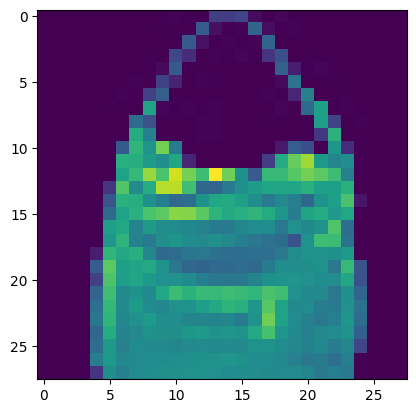

Prediction: 8, True: 8
Bag


In [17]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

img = 11

plt.imshow((X_test[img].reshape(28, 28)))
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction])